# PlaiCraft DSCI 100 Individual Planning


#### Can age and experience predict the total hours played so we can target similar players for large-data recruitment?
Using provided datasets, I'll investigate this question for Frank Wood's CS research group's game, PlaiCraft. The main dataset used will be players.csv.

The addressed broad question: "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts". 

### 1. Pre-Inspection Details

 - Collection period: May 1-September 1, 2024
 - Session tracking duration: once game was opened to closed
 - Overall, two NA values, two rows missing data
     - These were kept as other variables in those rows may be valuable

In [1]:
# Now, let's load in some R packages!
library(tidyverse)
library(ggplot2)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 2. Data Descriptions and Inspecting the Datasets with R Functions and Summaries

In [2]:
# Let's read in and inspect the datasets!
url_players <- "https://raw.githubusercontent.com/tchan0717/dsci-100-2025w1-group-36/refs/heads/main/data/players.csv"
players_data <- read_csv(url_players)
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


#### Description of the set (players.csv):

- 196 observations, 7 variables about the players:
1. `experience`: *character*-gaming "level" - Beginner, Amateur, Regular, Veteran, Pro (most experienced)
2. `subscribe`: *logical*-PlaiCraft newsletter subscription: TRUE="yes", FALSE="no"
3. `hashedEmail`: *character*-email in form of numbers and letters
4. `played_hours`: *double*-total hours played
5. `name`: *character*-first name
6. `gender`: *character*-gender
7. `age`: *double*-age

##### Issues: 
- `subscribe` is ambiguous - likely indicates newsletter subscription
- `experience` "level" order is unclear
    - Assumed order stated above, but no metadata to verify
 
Tidy data is one variable per column, one observation per row, and one value per cell. Wrangling isn't needed as dataset follows this.

#### Summary #1 - Experience

In [3]:
experience_count <- players_data |>
                        group_by(experience) |>
                        summarize(count = n())

experience_summary <- experience_count |>
                        ungroup() |>
                        mutate(percent_of_overall_dataset = count/sum(count) * 100) |> 
                        mutate(percent_of_overall_dataset = round(percent_of_overall_dataset, 2)) #round to 2 decimal places
experience_summary

experience,count,percent_of_overall_dataset
<chr>,<int>,<dbl>
Amateur,63,32.14
Beginner,35,17.86
Pro,14,7.14
Regular,36,18.37
Veteran,48,24.49


#### Summary #2 - Played Hours

In [4]:
played_hours_summary <- players_data |>
                            summarize(mean = mean(played_hours, na.rm = TRUE),
                                      sum = sum(played_hours, na.rm = TRUE),
                                      most = max(played_hours),
                                      least = min(played_hours)) |>
                            mutate(across(mean:least, ~ round(.x, 2)))    
played_hours_summary                      

mean,sum,most,least
<dbl>,<dbl>,<dbl>,<dbl>
5.85,1145.8,223.1,0


#### Summary #3 - Subscribed

In [5]:
subscribe_count <- players_data |>
                        group_by(subscribe) |>
                        summarize(count = n())

subscribe_summary <- subscribe_count |>
                        ungroup() |>
                        mutate(percent_of_overall_dataset = count/sum(count) * 100) |>
                        mutate(percent_of_overall_dataset = round(percent_of_overall_dataset, 2))
subscribe_summary

subscribe,count,percent_of_overall_dataset
<lgl>,<int>,<dbl>
FALSE,52,26.53
TRUE,144,73.47


#### Summary #4 - Gender

In [6]:
gender_count <- players_data |>
                    group_by(gender) |>
                    summarize(count = n())

gender_summary <- gender_count |>
                        ungroup() |>
                        mutate(percent_of_overall_dataset = count/sum(count) * 100) |>
                        mutate(percent_of_overall_dataset = round(percent_of_overall_dataset, 2))
gender_summary

gender,count,percent_of_overall_dataset
<chr>,<int>,<dbl>
Agender,2,1.02
Female,37,18.88
Male,124,63.27
Non-binary,15,7.65
Other,1,0.51
Prefer not to say,11,5.61
Two-Spirited,6,3.06


#### Summary #5 - Age (Years)

In [7]:
age_summary <- players_data |>
                    summarize(mean = mean(Age, na.rm = TRUE),
                              oldest = max(Age, na.rm = TRUE),
                              youngest = min(Age, na.rm = TRUE)) |>
                    mutate(across(mean:youngest, ~ round(.x, 2)))    
age_summary   

mean,oldest,youngest
<dbl>,<dbl>,<dbl>
21.14,58,9


In [8]:
# Now, let's read in sessions.csv!
url_sessions <- "https://raw.githubusercontent.com/tchan0717/dsci-100-2025w1-group-36/refs/heads/main/data/sessions.csv"
sessions_data <- read_csv(url_sessions)
sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


#### Description of the set (sessions.csv):

- 1535 observations, 5 variables:
1. `hashedEmail`: *character*-email in form of numbers and letters
2. `start_time`: *character*-session start time (DD/MM/YYYY", "time (24-hour-clock)")
4. `end_time`: *character*-session end time ("DD/MM/YYYY", time (24-hour-clock)")
5. `original_start_time`: *double*-session start time in UNIX (milliseconds)
6. `original_end_time`: *double*-session end time in UNIX (milliseconds)

This dataset isn't the focus, but beneficial to understand.

In [9]:
# I will merge the datasets together too to simplify future explorations:
sessions_players_merged <- merge(players_data, sessions_data, by = "hashedEmail", all = TRUE)
sessions_players_merged

hashedEmail,experience,subscribe,played_hours,name,gender,Age,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,23/05/2024 00:22,23/05/2024 01:07,1.71642e+12,1.71643e+12
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,22/05/2024 23:12,23/05/2024 00:13,1.71642e+12,1.71642e+12
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,Veteran,TRUE,0.0,Frankie,Male,17,NA,NA,NA,NA
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,28/06/2024 04:28,28/06/2024 04:58,1.71955e+12,1.71955e+12
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,TRUE,0.1,Osiris,Male,17,19/09/2024 21:01,19/09/2024 21:12,1.72678e+12,1.72678e+12
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,30/08/2024 03:40,30/08/2024 04:04,1.72499e+12,1.72499e+12
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,27/08/2024 19:18,27/08/2024 19:52,1.72479e+12,1.72479e+12
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,30/08/2024 17:49,30/08/2024 18:48,1.72504e+12,1.72504e+12
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,31/08/2024 22:44,31/08/2024 23:20,1.72514e+12,1.72515e+12


### 3. Exploratory Data Analysis and Visualization


Let's create visualizations to seek out relationships and overlooked issues.

#### Visualization #1

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


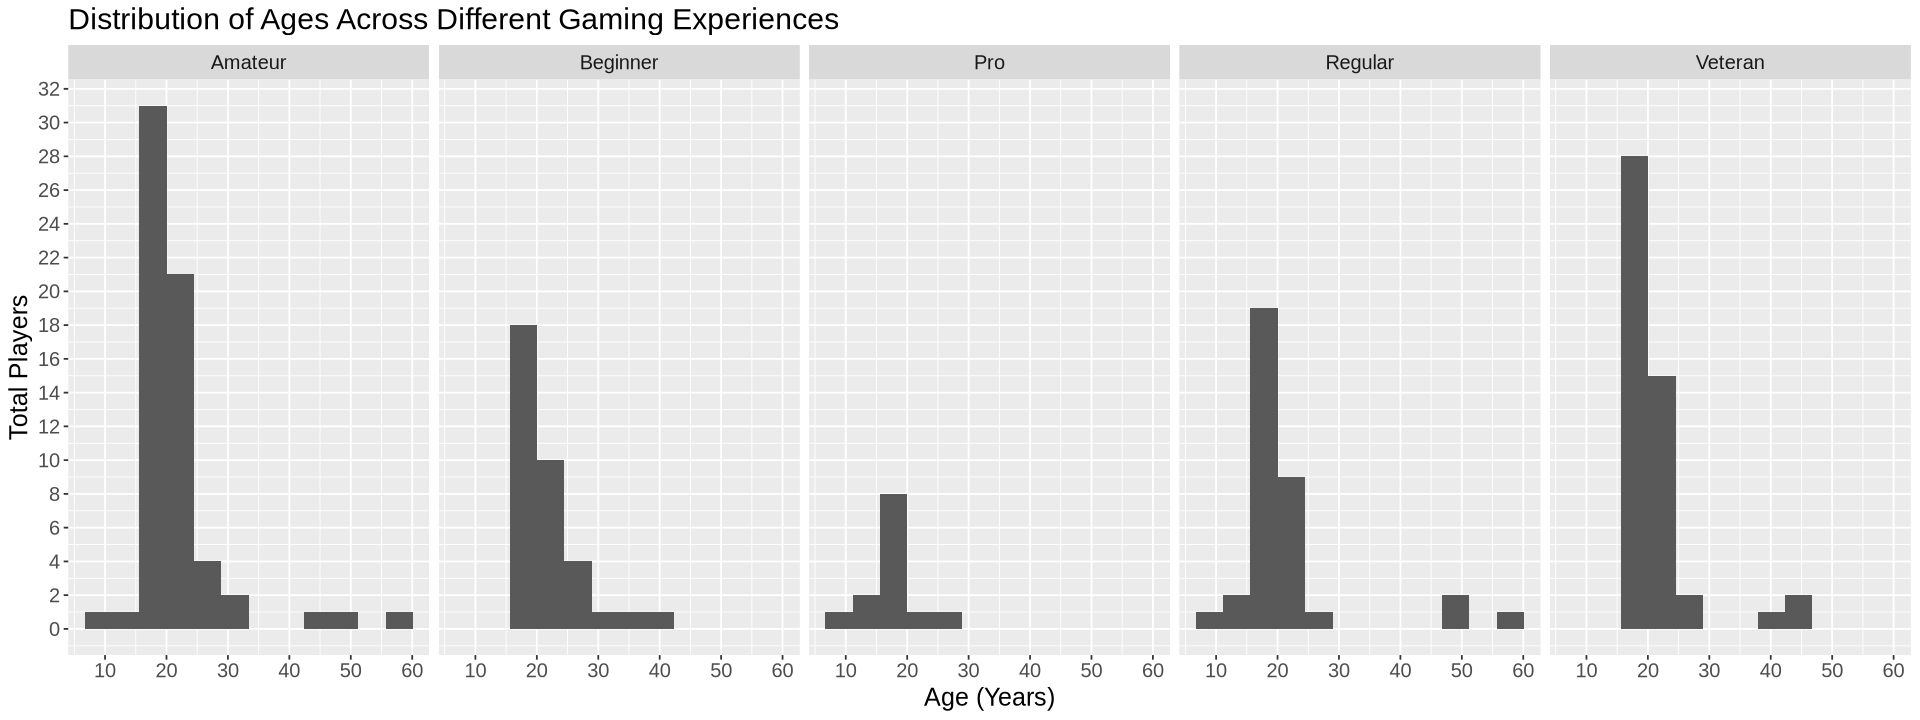

In [10]:
options(repr.plot.width = 16, repr.plot.height = 6)

age_histogram <- ggplot(players_data, aes(x = Age)) +
                    geom_histogram(bins = 12) +
                    labs(x = "Age (Years)", y = "Total Players") +
                    ggtitle("Distribution of Ages Across Different Gaming Experiences") +
                    scale_y_continuous(breaks = seq(0, 32, by = 2)) +
                    scale_x_continuous(breaks = seq(0, 60, by = 10)) +
                    facet_grid(cols = vars(experience)) +
                    theme(text = element_text(size = 15))
age_histogram

- Majority ~17 years old
- Numerous teenagers and young adults
   - Few young children and adults
- Many Amateurs and Veterans
- Age &ne; to gaming experience

#### Visualization #2

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


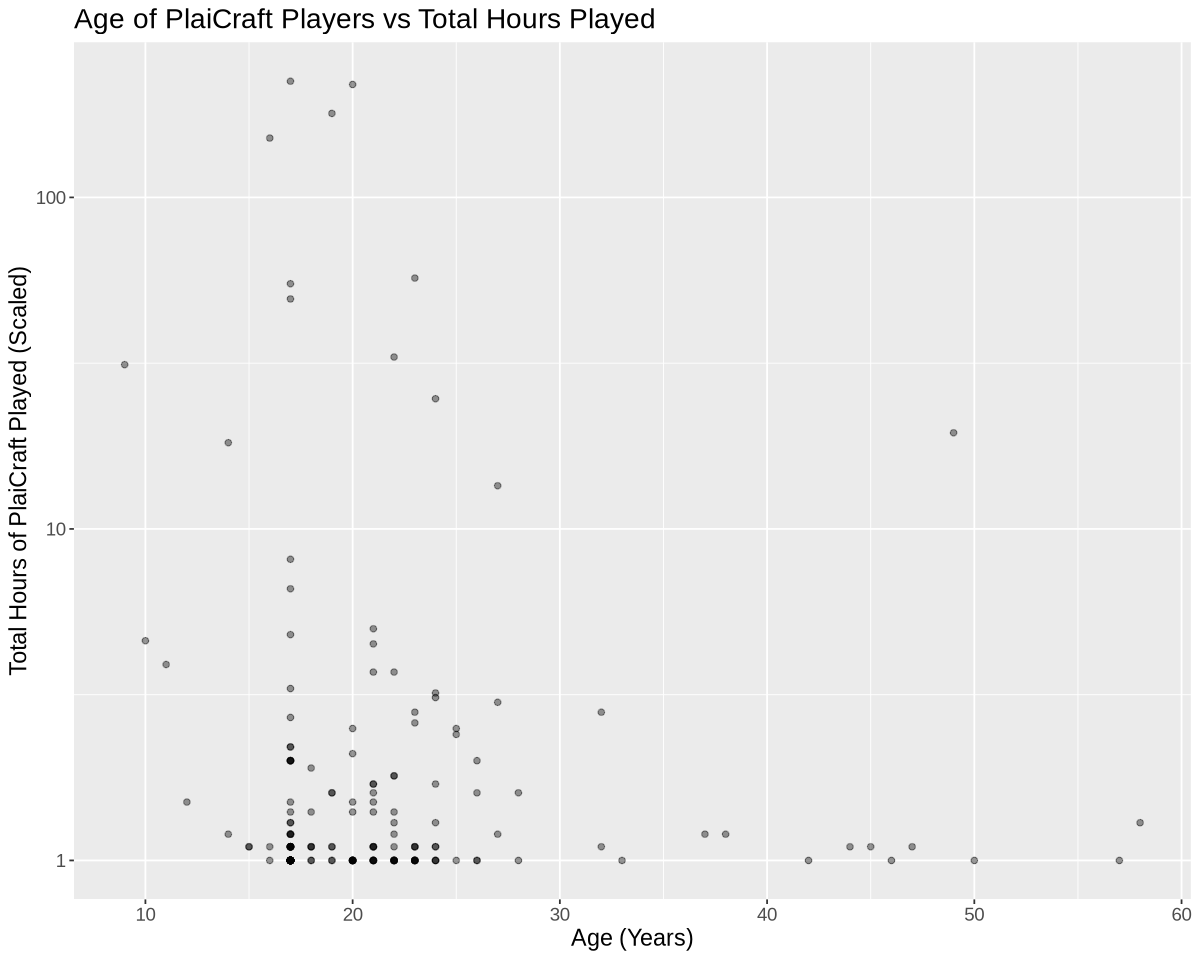

In [11]:
options(repr.plot.width = 10, repr.plot.height = 8)

played_hours_age_plot <- ggplot(players_data, aes(x = Age, y = played_hours + 1)) + #add +1 so that when we log our y-axis, the 0 values won't be infinity
                            geom_point(alpha = 0.4) +
                            labs(x = "Age (Years)", y = "Total Hours of PlaiCraft Played (Scaled)") +
                            ggtitle("Age of PlaiCraft Players vs Total Hours Played") +
                            scale_y_log10() +
                            theme(text = element_text(size = 14))
played_hours_age_plot

- No relationship nor clear trend
    - Widespread points
- Condensed near bottom of graph
- Insinuates teens and young adults play more
    - Likely player dependent though

#### Visualization #3

`summarise()` has grouped output by 'hashedEmail', 'played_hours'. You can
override using the `.groups` argument.


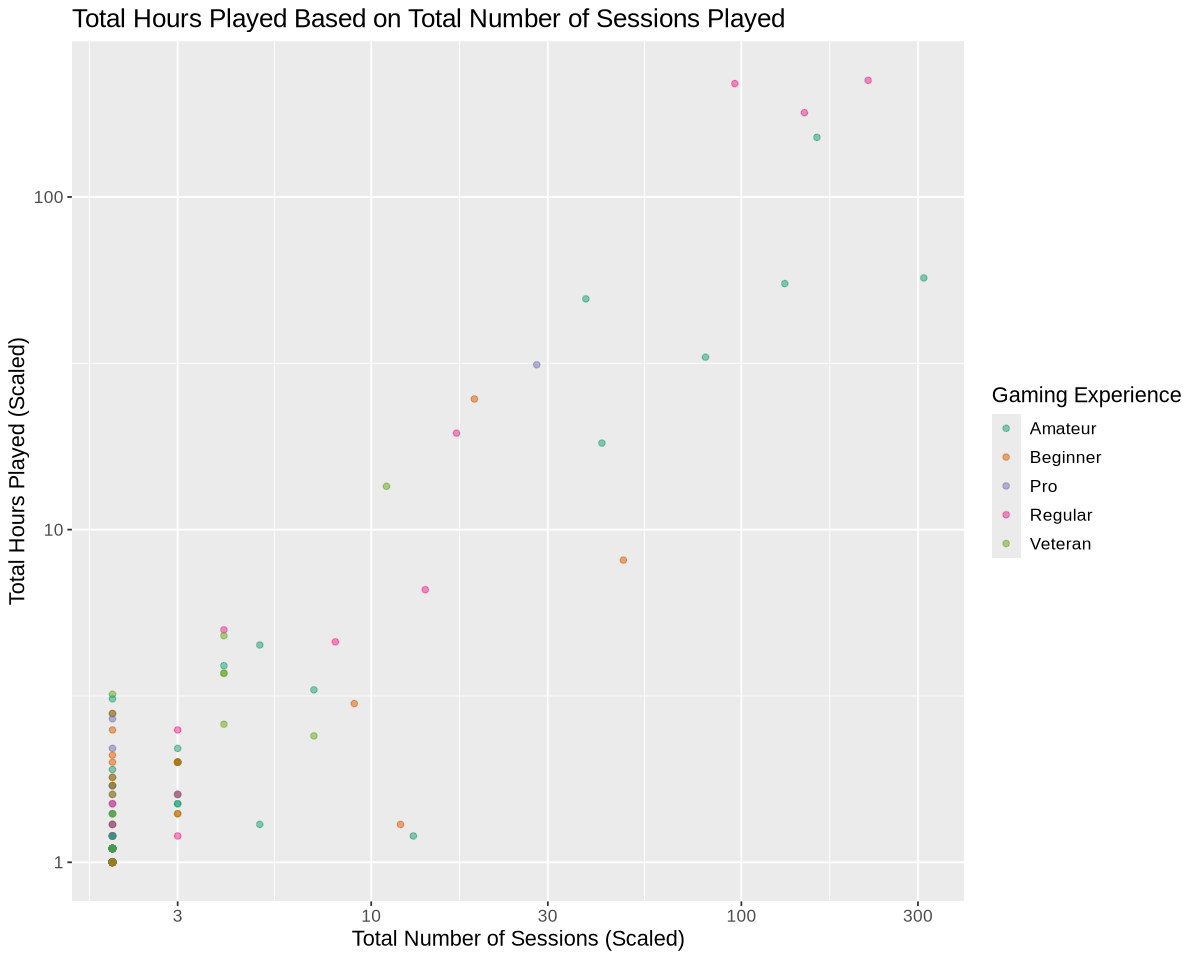

In [12]:
options(repr.plot.width = 10, repr.plot.height = 8)

sessions_hours_total <- sessions_players_merged |>
                        select(hashedEmail, played_hours, experience) |>
                        group_by(hashedEmail, played_hours, experience) |>
                        summarize(count = n()) #summarizing how many sessions each player played

experience_sessions_plot <- sessions_hours_total |>
                        ggplot(aes(x = count + 1, y = played_hours + 1, color = experience)) +
                            geom_point(alpha = 0.5) +
                            labs(x = "Total Number of Sessions (Scaled)", y = "Total Hours Played (Scaled)", colour = "Gaming Experience") +
                            ggtitle("Total Hours Played Based on Total Number of Sessions Played") +
                            scale_color_brewer(palette = "Dark2") +
                            scale_y_log10() +
                            scale_x_log10() +
                            theme(text = element_text(size = 13))
experience_sessions_plot                        

- Strong, positive relationship
    - Variables increase together
- Identical session counts &ne; identical hours played
- Gaming experience fairly scattered
    - Some Regulars and Amateurs played the most sessions and hours

#### Visualization #4

`summarise()` has grouped output by 'hashedEmail', 'played_hours'. You can
override using the `.groups` argument.


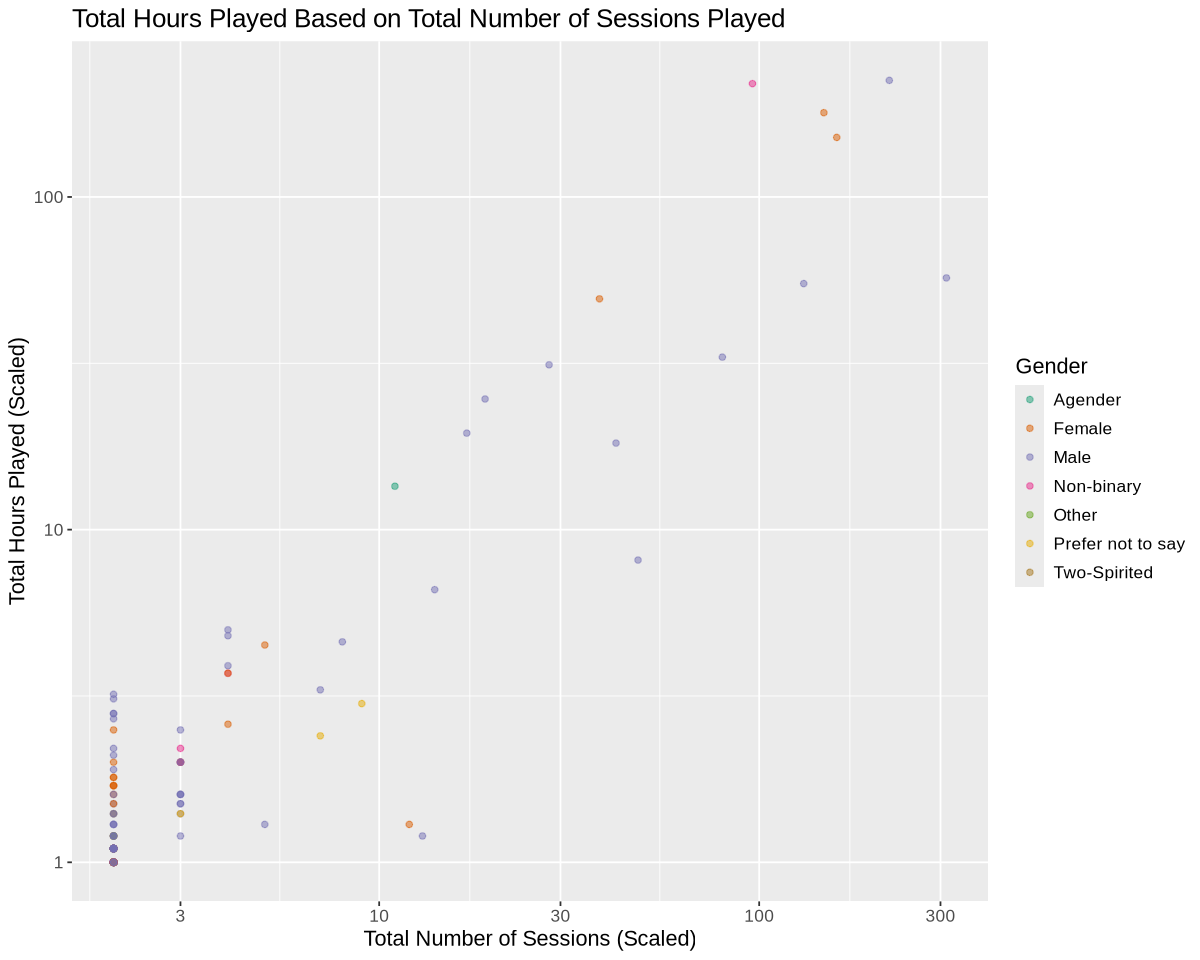

In [121]:
options(repr.plot.width = 10, repr.plot.height = 8)

sessions_hours_total_2 <- sessions_players_merged |>
                        select(hashedEmail, played_hours, gender) |>
                        group_by(hashedEmail, played_hours, gender) |>
                        summarize(count = n())

gender_sessions_plot <- sessions_hours_total_2 |>
                        ggplot(aes(x = count + 1, y = played_hours + 1, color = gender)) +
                            geom_point(alpha = 0.5) +
                            labs(x = "Total Number of Sessions (Scaled)", y = "Total Hours Played (Scaled)", colour = "Gender") +
                            ggtitle("Total Hours Played Based on Total Number of Sessions Played") +
                            scale_color_brewer(palette = "Dark2") +
                            scale_y_log10() +
                            scale_x_log10() +
                            theme(text = element_text(size = 13))
gender_sessions_plot        

- Gender is scattered
- Males dominant outer range
   - Play more hours and sessions 

### 4. Methods and Plans

The model objective is to predict *played_hours* from *Age* and *experience* to decide which players to "target". I'd use KNN regression with players.csv as it contains all necessary variables, and mutate the *experience* categories to numerical levels (1=beginner,...5=pro). 

KNN regression is appropriate because it's flexible, doesn't assume relationship shapes, and predicts numerical values off similarities with training data. Contrastingly, KNN classification predicts categories. Visualizations, like #1, show no linear relationship, so linear regression isn't preferred. To confirm the better model, KNN vs linear, I'd assess them on the testing data. The smaller RMSPE value is the better model.

I chose predictor variables, experience and Age, because they describe player "kinds" and provide differences in player behaviour. Typically, they contribute significantly in determining total gametime. Gender was excluded due to ambiguous values, "prefer not to say" and "other", which don't aid in distinguishing player "kinds". Furthermore, session times are random; it's not a unique player behaviour.

##### I'll process the data using the general KNN regression model steps with noted adjustments:
1. Mutate "experience"
2. Inspect and clean data
3. Split dataset
    - 75% training, 25% testing
4. Tune training set
    - Scale predictors
5. Cross-validate training set
    - 5 folds
    - Tested neighbors differ by 4; neighbors = 1,5,...196
6. Find optimal *k*, refit model, assess on testing data for RMSPE

KNN regression requires few assumptions, but has drawbacks. It assumes new observations resemble its training data. Thus, it's prone to inaccurate predictions for observations outside the training data range. Larger datasets increase computation time, and it's sensitive to noisy data and distance-dependent. So, scaling is needed to ensure comparable variable scales.

### GitHub Repository

https://github.com/tchan0717/dsci-100-2025w1-group-36.git

### References

Wickham, Hadley, and Garrett Grolemund. 2016. R for Data Science: Import, Tidy, Transform, Visualize, and Model Data. O’Reilly. https://r4ds.had.co.nz/.
\
\
The Pacific Laboratory of Artificial Intelligence. FAQ. Plaicraft. https://plaicraft.ai/faq. 